<a href="https://colab.research.google.com/github/Nico-GP/Coding-Dojo_Track2/blob/main/Week8/Customer_Segment_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO**: Custumer Segment Comparison
## Creado por: Nicolas Gonzalez
### Descripcion: Segmentacion de clientes segun caracteristicas utilizando KMeans, jerárquica en clústeres y DBSCAN
* Creado: 21/02/22
* Ultima Actualizacion: 21/02/22

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd
cs = pd.read_csv('/content/drive/My Drive/CodingDojo/Week8/cust_seg.csv')
cs.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


Se establece la columna "Customer Id" como indice

In [97]:
cs.set_index('Customer Id', inplace = True)
cs.head(1)

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3


Se elimina la columna "Unnamed: 0"

In [98]:
cs.drop(columns = 'Unnamed: 0', inplace = True)
cs.head(1)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3


informacion sobre la base de datos

In [99]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 59.8 KB


Valores faltantes

In [100]:
cs.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [101]:
(cs.isnull().sum()/len(cs))*100

Age                 0.000000
Edu                 0.000000
Years Employed      0.000000
Income              0.000000
Card Debt           0.000000
Other Debt          0.000000
Defaulted          17.647059
DebtIncomeRatio     0.000000
dtype: float64

Se eliminan las filas con valores faltantes en la columna "Dafaulted" por no tener contexto al respecto

In [102]:
cs.dropna(inplace = True)

Se importan librerias

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

Se escalan los datos

In [104]:
scaler = StandardScaler()
cs_sc = scaler.fit_transform(cs)

# KMeans

Numero optimo de agrupaciones unsando kmeans

In [116]:
siluetas = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(cs_sc)
  siluetas.append(silhouette_score(cs_sc, kmeans.labels_))

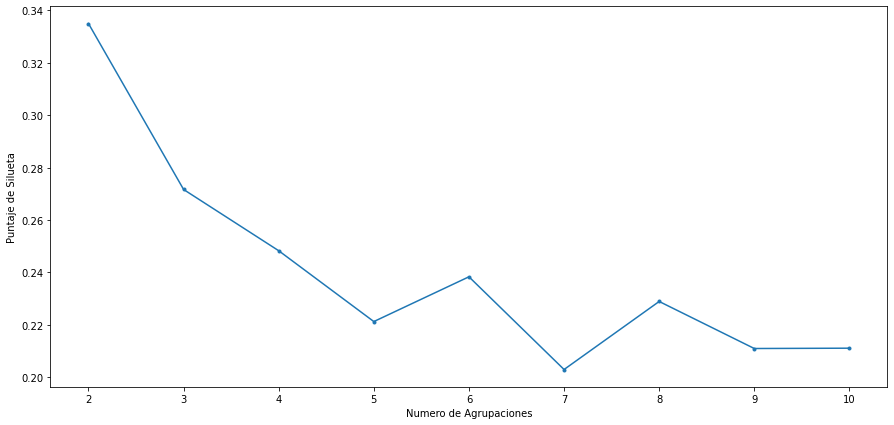

In [132]:
plt.figure(figsize = (15, 7));
plt.plot(range(2, 11), siluetas, marker = '.');
plt.xlabel('Numero de Agrupaciones');
plt.ylabel('Puntaje de Silueta');

Se crea nueva columna con los resultados

In [122]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(cs_sc)
cs['Kmeans Clusters'] = kmeans.labels_

# Agrupacion Jerarquica

Numero optimo de agrupaciones usando agglomerative clustering

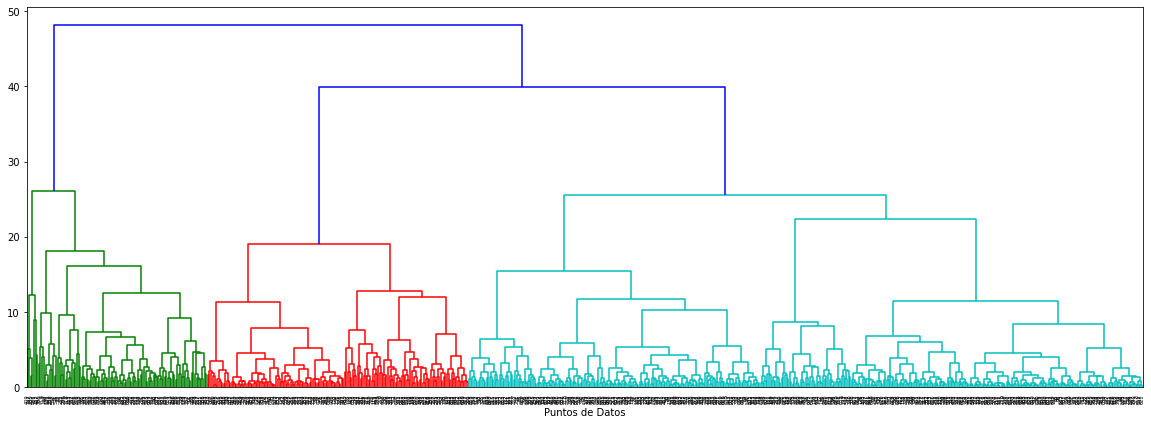

In [130]:
plt.figure(figsize = (20, 7));
sch.dendrogram(sch.linkage(cs_sc, method = 'ward'));
plt.xlabel('Puntos de Datos');

Se crea nueva columna con los resultados

In [134]:
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(cs_sc)
cs['HC Clusters'] = hc.labels_

# DBSCAN

No es necesario obtener el numero optimo de agrupaciones para dbscan

Se crea nueva columna con los resultados

In [136]:
dbs = DBSCAN().fit(cs_sc)
cs['DBS Clusters'] = dbs.labels_

## Puntajes de Siluetas

In [137]:
silhouette_score(cs_sc, cs['Kmeans Clusters'])

0.33496643365707623

In [138]:
silhouette_score(cs_sc, cs['HC Clusters'])

0.26443271651400624

In [139]:
silhouette_score(cs_sc, cs['DBS Clusters'])

-0.28649351883732704

> Basandose en los puntajes de siluetas, el modelo con mejor desempeño en este problema es el de KMeans